# Practice gradient descent

In this notebook we practice gradient descent on a few example cost functions.  We start with 2-dimensional examples (i.e., one weight input) and then solve their 3-dimensional analogs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Two-dimensional examples

## Lets minimize $g(w) = w^2$

Here's the cost function (in Python).

In [2]:
# cost function evaluator
def compute_cost_val(w):
    g = w**2
    return g

Since this takes in 1-dimensional input we can plot it using this cost function.

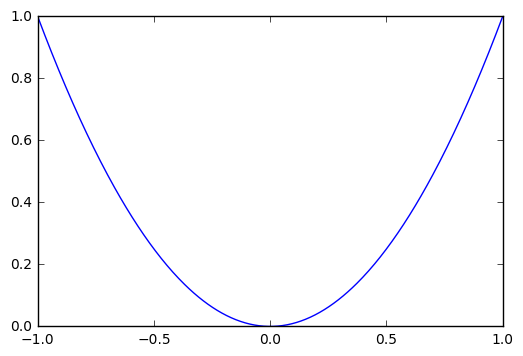

In [3]:
# lets plot using this cost function
w_inputs = np.linspace(-1,1,400)
gcost = compute_cost_val(w_inputs)
plt.plot(w_inputs,gcost)
plt.show()

Great, now lets make a derivative and gradient descent looping functions.

In [13]:
# gradient calculation
def calculate_gradient(w):
    g_prime = 2*w
    return g_prime

In [14]:
# gradient descent loop
def grad_descent(alpha,K,w0):
    w = w0
    
    # create container to record weights
    whist = []
    
    # descent loop
    for k in range(K):
        # record current weight
        whist.append(w)
        
        # compute derivative
        grad = calculate_gradient(w)
        
        # take descent step
        w = w - alpha*grad
        
    return whist

With these defined we can run gradient descent.

In [15]:
# inputs to gradient descent
w0 = 2*np.random.rand(1) - 1
alpha = 0.01
K = 100

# run gradient descent
whist = grad_descent(alpha,K,w0)

Since we decided to return the weight history of our gradient descent run we can plot the cost function value at each step, which we do below.  This will help us tune our step length properly.

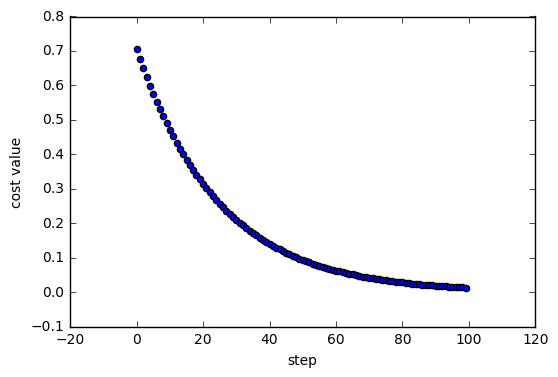

In [18]:
# compute the associated ccst function values
ghist = []
for w in whist:
    g = compute_cost_val(w)
    ghist.append(g)

# plot cost history
plt.scatter(np.arange(len(ghist)),ghist)
plt.xlabel('step')
plt.ylabel('cost value')
plt.show()

In [19]:
print 'the output weight was ' + str(w)
print 'the output associated cost val was ' + str(compute_cost_val(w))

the output weight was [ 0.11359039]
the output associated cost val was [ 0.01290278]


## Lets minimize $g(w) = sin(w) + 0.01w^2$

We'll do the same thing here we did above for the previous cost function - that is create functions to compute the cost value, gradient value, and gradient descent loop.

In [21]:
# cost function evaluator
def compute_cost_val(w):
    g = np.sin(w) + 0.01*w**2
    return g

We can again plot the cost function itself.  This time we have something that is quite non-convex!

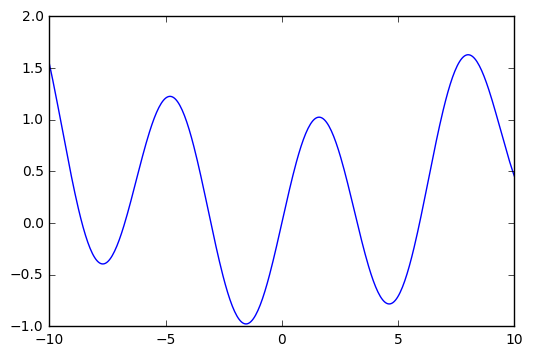

In [22]:
# lets plot using this cost function
w_inputs = np.linspace(-10,10,400)

gcost = []
for w in w_inputs:
    g = compute_cost_val(w)
    gcost.append(g)
plt.plot(w_inputs,gcost)
plt.show()

Time to compute the gradient / make the gradient descent loop.

In [23]:
# gradient calculation
def calculate_gradient(w):
    g_prime = np.cos(w) + 2*0.01*w
    return g_prime

In [24]:
# gradient descent loop
def grad_descent(alpha,K,w0):
    w = w0
    
    # create container to record weights
    whist = []
    
    # descent loop
    for k in range(K):
        # record current weight
        whist.append(w)
        
        # compute derivative
        grad = calculate_gradient(w)
        
        # take descent step
        w = w - alpha*grad
        
    return whist

Because the cost function is non-convex we'll need to run it several times from random initial points - keeping the run that gave us the lowest value on the cost.

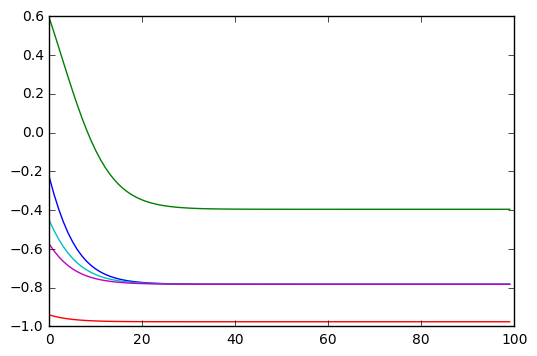

In [25]:
# my meta container for recording the weight history of all runs
trials = []
for t in range(5):
    # inputs to gradient descent
    w0 = 20*np.random.rand(1) - 10
    alpha = 0.1
    K = 100

    # run gradient descent
    whist = grad_descent(alpha,K,w0)

    # record current run weight history
    trials.append(whist)
    
    # compute the associated ccst function values
    ghist = []
    for w in whist:
        g = compute_cost_val(w)
        ghist.append(g)

    plt.plot(ghist)
    plt.xlabel('step')
    plt.ylabel('cost value')
    plt.show()

# 2. Three-dimensional examples

Here we minimize the two-dimensional input analogs of the functions above using gradient descent.  

## Lets minimize $g(\mathbf{w}) = \mathbf{w}^T\mathbf{w}$

Here's the cost function (in Python).

In [2]:
# cost function evaluator
def compute_cost_val(w):
    g = np.dot(w.T,w)
    return g

We can use this to plot the cost function - but note if we go any further up in dimension we won't be able to plot the cost!

<IPython.core.display.Javascript object>


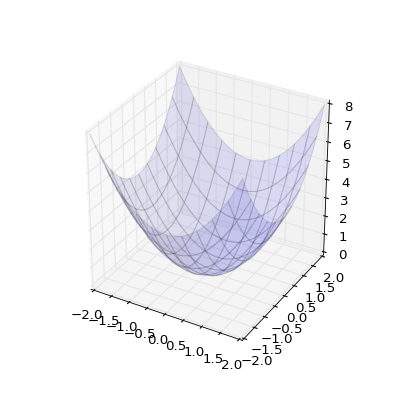

In [3]:
%matplotlib nbagg

# make a 3d figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection = '3d')

# create plotting range
r = np.linspace(-2,2,100)

# create grid from plotting range
xx,yy = np.meshgrid(r,r)
xx.shape = (len(r)**2,1)
yy.shape = (len(r)**2,1)

# create cost surface
ww = np.concatenate((xx,yy),axis = 1)
g = []
for i in range(len(ww)):
    temp_w = np.array(ww[i,:])
    temp_w = np.array(temp_w)
    temp_w.shape = (2,1)
    temp_g = compute_cost_val(temp_w)
    g.append(temp_g)
g = np.array(g)
    
# plot cost surface
xx.shape = (len(r),len(r))
yy.shape = (len(r),len(r))
g.shape = (len(r),len(r))
ax.plot_surface(xx,yy,g,alpha = 0.1)
plt.show()

Looks pretty convex.  Now the rest!  Just as before.

In [4]:
# gradient calculation
def calculate_gradient(w):
    g_prime = 2*w
    return g_prime

In [5]:
# gradient descent loop
def grad_descent(alpha,K,w0):
    w = w0
    
    # create container to record weights
    whist = []
    
    # descent loop
    for k in range(K):
        # record current weight
        whist.append(w)
        
        # compute derivative
        grad = calculate_gradient(w)
        
        # take descent step
        w = w - alpha*grad
        
    return whist

In [6]:
# inputs to gradient descent
w0 = 4*np.random.rand(2,1) - 2
alpha = 10**-2
K = 200

# run gradient descent
whist = grad_descent(alpha,K,w0)

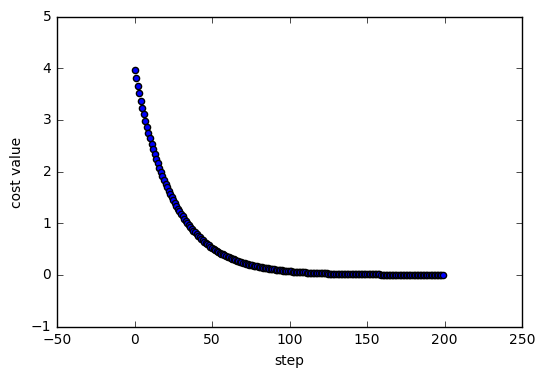

In [7]:
# compute the associated ccst function values
%matplotlib inline
ghist = []
for w in whist:
    wtemp = np.array(w)
    wtemp.shape = (2,1)
    g = compute_cost_val(wtemp)
    ghist.append(g)

# plot cost history
plt.scatter(np.arange(len(ghist)),ghist)
plt.xlabel('step')
plt.ylabel('cost value')
plt.show()

## Lets minimize $g(\mathbf{w}) = sin(\mathbf{w}^T\mathbf{1}) + 0.01\mathbf{w}^T\mathbf{w}$

Here's the cost function (in Python).

Cost function.

In [8]:
# cost function evaluator
def compute_cost_val(w):
    o = np.ones((2,1))
    g = np.sin(np.dot(w.T,o)) + 0.01*np.dot(w.T,w)
    return g

Plot the cost.

<IPython.core.display.Javascript object>


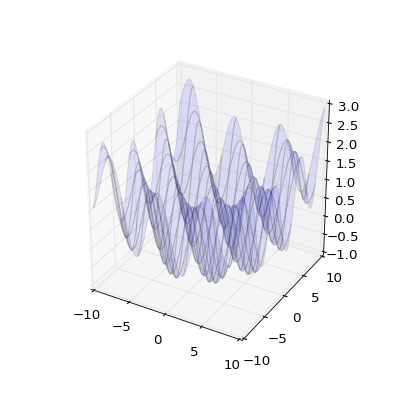

In [9]:
%matplotlib nbagg

# make a 3d figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection = '3d')

# create plotting range
r = np.linspace(-10,10,100)

# create grid from plotting range
xx,yy = np.meshgrid(r,r)
xx.shape = (len(r)**2,1)
yy.shape = (len(r)**2,1)

# create cost surface
ww = np.concatenate((xx,yy),axis = 1)
g = []
for i in range(len(ww)):
    temp_w = np.array(ww[i,:])
    temp_w = np.array(temp_w)
    temp_w.shape = (2,1)
    temp_g = compute_cost_val(temp_w)
    g.append(temp_g)
g = np.array(g)
    
# plot cost surface
xx.shape = (len(r),len(r))
yy.shape = (len(r),len(r))
g.shape = (len(r),len(r))
ax.plot_surface(xx,yy,g,alpha = 0.1)
plt.show()

WOAH - now thats wavy.  And super non-convex.

In [10]:
# gradient calculation
def calculate_gradient(w):
    g_1 = np.cos(w[0]) + 2*0.01*w[0]
    g_2 = np.cos(w[1]) + 2*0.01*w[1]
    g_prime = np.array([g_1,g_2])
    g_prime.shape = (2,1)
    return g_prime

In [11]:
# gradient descent loop
def grad_descent(alpha,K,w0):
    w = w0
    
    # create container to record weights
    whist = []
    
    # descent loop
    for k in range(K):
        # record current weight
        whist.append(w)
        
        # compute derivative
        grad = calculate_gradient(w)
        
        # take descent step
        w = w - alpha*grad
        
    return whist

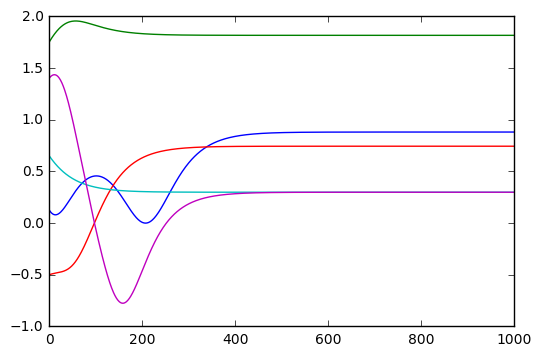

In [26]:
# my meta container for recording the weight history of all runs
trials = []
for t in range(5):
    # inputs to gradient descent
    w0 = 20*np.random.rand(2,1) - 10
    alpha = 2*10**-2
    K = 1000

    # run gradient descent
    whist = grad_descent(alpha,K,w0)

    # record current run weight history
    trials.append(whist)
    
    # compute the associated ccst function values
    ghist = []
    for w in whist:
        g = compute_cost_val(w)
        ghist.append(g[0])
    plt.plot(ghist)
plt.xlabel('step')
plt.ylabel('cost value')
plt.show()

Weird result!  What do you think is happening here?